explain modules

explain numpy

In [1]:
import numpy as np

blah blah

###Creating numpy arrays

You can create an array from scratch, similar to how you might create a list / tuple / whatever:

In [2]:
a = np.array([1,2,3])    # or np.array((1,2,3))
print a

[1 2 3]


You can also convert a list or tuple of elements into an array:

In [3]:
myList = [0.2, 0.4, 0.6]
myArray = np.array(myList)
print myList
print myArray

[0.2, 0.4, 0.6]
[ 0.2  0.4  0.6]


Arrays can be created with non-numbers as well, but all the elements of an array have to have the same type:

In [4]:
print np.array([True, False, True])

[ True False  True]


In [5]:
print np.array(['a', 'b', 'c'])

['a' 'b' 'c']


In [6]:
print np.array([2, 3, 'c'])

['2' '3' 'c']


In [7]:
print np.array([2, 3, 'c'], dtype=int)

ValueError: invalid literal for long() with base 10: 'c'

You can access elements of an array in the same way you access elements of a list:

In [8]:
print myArray[0]

0.2


In [9]:
print myArray[-1]

0.6


In [10]:
print myArray[1:]

[ 0.4  0.6]


Multidimensional arrays work like you'd expect:

In [11]:
newArray = np.array([ [3, 8, 0, 1],
                      [4, 0, 0, 9],
                      [2, 2, 7, 1],
                      [5, 1, 0, 8]] )
print newArray
print newArray.shape

[[3 8 0 1]
 [4 0 0 9]
 [2 2 7 1]
 [5 1 0 8]]
(4, 4)


In [12]:
print newArray[0]

[3 8 0 1]


In [13]:
print newArray[1,3]

9


In [14]:
print newArray[3,0:2]

[5 1]


If you know the size of the array you want, you can create an array of ones or zeros:

In [15]:
b = np.ones((3,2))
print b
print b.shape

[[ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]]
(3, 2)


In [16]:
c = np.zeros((1,3), int)
print c
print type(c)
print c.dtype

[[0 0 0]]
<type 'numpy.ndarray'>
int64


In [17]:
d = np.zeros(3, complex)
print d
print d.dtype

[ 0.+0.j  0.+0.j  0.+0.j]
complex128


Create an identity array:

In [18]:
print np.eye(5, dtype=int)    # default data type is 'float'

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


A few ways to generate uniformly spaced numbers over an interval (including both endpoints):

In [19]:
print np.arange(-5, 5, 0.5)    # excludes upper endpoint

[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.
  2.5  3.   3.5  4.   4.5]


In [20]:
print np.linspace(-3, 3, 7)     # includes both endpoints

[-3. -2. -1.  0.  1.  2.  3.]


In [21]:
print np.logspace(1, 4, 4)

[    10.    100.   1000.  10000.]


### Working with arrays

In [22]:
print newArray

[[3 8 0 1]
 [4 0 0 9]
 [2 2 7 1]
 [5 1 0 8]]


In [23]:
print newArray.reshape(2,8)

[[3 8 0 1 4 0 0 9]
 [2 2 7 1 5 1 0 8]]


In [24]:
print newArray.reshape(-1,2)

[[3 8]
 [0 1]
 [4 0]
 [0 9]
 [2 2]
 [7 1]
 [5 1]
 [0 8]]


However, none of these manipulations have modified the original newArray:

In [25]:
print newArray

[[3 8 0 1]
 [4 0 0 9]
 [2 2 7 1]
 [5 1 0 8]]


In [26]:
reshapedArray = newArray.reshape(2,8)
print reshapedArray
print newArray

[[3 8 0 1 4 0 0 9]
 [2 2 7 1 5 1 0 8]]
[[3 8 0 1]
 [4 0 0 9]
 [2 2 7 1]
 [5 1 0 8]]


selecting elements with particular properties

In [27]:
redshifts =  np.array((0.2, 1.56, 6.3, 0.003, 0.9, 4.54, 1.1))

In [28]:
close = np.where(redshifts < 1)
print close
print redshifts[close]

(array([0, 3, 4]),)
[ 0.2    0.003  0.9  ]


In [29]:
middle = np.where( (redshifts >= 1) & (redshifts<2) )
print redshifts[middle]

[ 1.56  1.1 ]


In [30]:
far = redshifts > 2
print far
print redshifts[far]

[False False  True False False  True False]
[ 6.3   4.54]


Math with arrays is straightforward and easy. For instance, let's say we want to multiply every number in a group by 3. If we try to do that with a list:

In [31]:
myList = [3, 6, 7, 2]
print 2*myList

[3, 6, 7, 2, 3, 6, 7, 2]


In [32]:
myArray = np.array([3, 6, 7, 2])
print 2*myArray

[ 6 12 14  4]


Adding, subtracting, multiplying, and dividing with arrays is done **element-by-element**:

In [33]:
arr1 = np.arange(4)
arr2 = np.arange(10,14)
print arr1
print arr2

[0 1 2 3]
[10 11 12 13]


In [34]:
print arr1 + arr2
print arr1 - arr2
print arr1 * arr2
print arr1 / arr2

[10 12 14 16]
[-10 -10 -10 -10]
[ 0 11 24 39]
[0 0 0 0]


In [35]:
print 3.5 + arr1

[ 3.5  4.5  5.5  6.5]


In the last example, numpy understood the command to be "add 3.5 to every element in arr1." That is, it converts the scalar 3.5 into an array of the appropriate size. Since the new array is filled with floats, and arr1 is filled with ints, the summed array is an array of floats.

In [36]:
arr1 += 10
print arr1

[10 11 12 13]


In [37]:
arr1.fill(0)
print arr1

[0 0 0 0]


In [38]:
print arr2
print np.mean(arr2), arr2.mean()
print np.sum(arr2), arr2.sum()
print np.min(arr2), arr2.min()

[10 11 12 13]
11.5 11.5
46 46
10 10


### Generating random numbers

intro

In [39]:
print np.random.rand(10)
print np.random.rand(2,2)

[ 0.86931379  0.84850283  0.39009593  0.70742116  0.5050364   0.98687179
  0.15640748  0.5675921   0.83150816  0.24860754]
[[ 0.87461839  0.86103436]
 [ 0.84143786  0.07548749]]


In [40]:
print np.random.randint(2,100,5)

[47 54 54 27 32]


In [41]:
print np.random.normal(10, 3, (2,4))

[[ 10.52198335  12.03905712   8.74638352   7.26246632]
 [ 13.68497408  14.7595361   13.85128575  13.51072905]]


In [42]:
print np.random.randn(5)    # samples 5 times from the standard normal distribution

[ 0.36211387 -1.20225626 -0.33250919  1.37450428 -0.08373428]


In [43]:
print np.random.normal(3, 1, 5)    # samples 5 times from a Gaussian with mean 3 and std dev 1

[ 3.93646718  2.26742496  2.6114875   3.57253089  3.18095072]


### Numpy I/O with arrays

Numpy makes it easy to write arrays to files and read them. Some basic examples to get you started:

In [44]:
arr3 = np.random.rand(6,5)
print arr3

[[ 0.32933127  0.23868935  0.75082781  0.71417981  0.85875244]
 [ 0.57174736  0.54884092  0.62941516  0.81536656  0.96711407]
 [ 0.6573975   0.95154994  0.94966     0.28278096  0.37580898]
 [ 0.95510876  0.22955935  0.23862871  0.24072037  0.95318066]
 [ 0.11469753  0.93744166  0.97506269  0.63073702  0.62541965]
 [ 0.1684718   0.0934931   0.74601212  0.95629515  0.3291206 ]]


In [45]:
np.savetxt('arrayFile.txt', arr3)

In [46]:
arr4 = np.loadtxt('arrayFile.txt')

In [47]:
print arr3 == arr4

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


## Matplotlib intro

link to gallery

http://matplotlib.org/gallery.html

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

To plot a collection of x- and y-values:

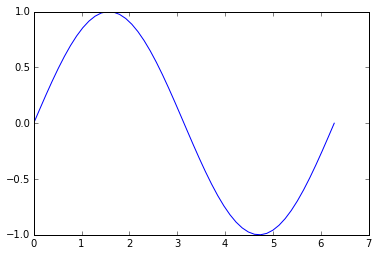

In [49]:
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)
plt.plot(x, y)

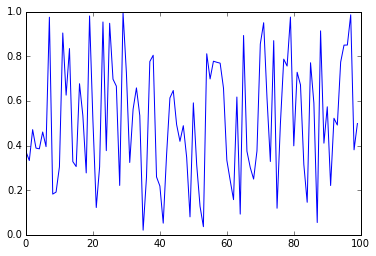

In [50]:
### If you don't give it x values:
plt.plot(np.random.rand(100))

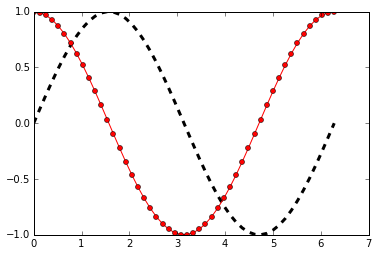

In [51]:
### Multiple plots together
plt.plot(x, y, color='black', lw=3, ls='--')    # x and y were defined two plots ago
plt.plot(x, np.cos(x), 'o-', color='r', markersize=5)

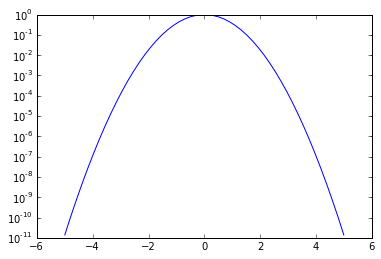

In [52]:
### log and semilog plots
x = np.linspace(-5, 5)
y = np.exp(-x**2)
plt.semilogy(x,y)

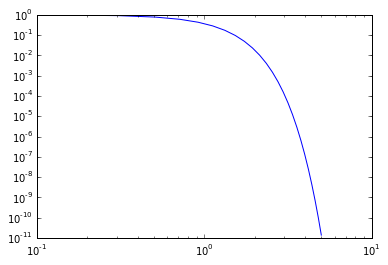

In [53]:
plt.loglog(x,y)

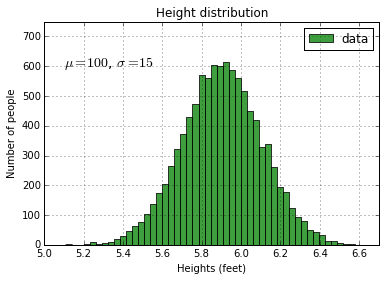

In [54]:
mu, sigma = 5.9, 0.2
measurements = mu + sigma * np.random.randn(10000)

# the histogram of the data
plt.hist(measurements, 50, normed=False, facecolor='g', alpha=0.75, label='data')

plt.xlabel('Heights (feet)')
plt.ylabel('Number of people')
plt.title('Height distribution')
# This will put a text fragment at the position given:
plt.text(5.1, 600, r'$\mu=100$, $\sigma=15$', fontsize=14)
plt.axis([5,6.7,0,750])
plt.grid(True)
plt.legend()

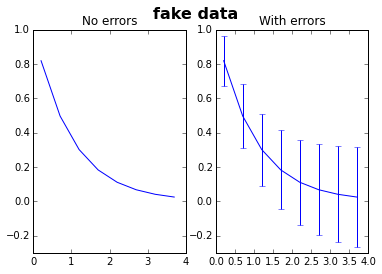

In [55]:
### Error bars and subplots

# generate some fake data, with errors in y
x = np.arange(0.2, 4, 0.5)
y = np.exp(-x)
errors = 0.1 + 0.1*np.sqrt(x)


fig = plt.figure()

noErrs = fig.add_subplot(121)
plt.plot(x, y)
plt.xticks((0,1,2,3,4))
noErrs.set_title('No errors')
noErrs.set_ylim(-0.3,1)

withErrs = fig.add_subplot(122)
withErrs.errorbar(x, y, yerr=errors)
withErrs.set_title('With errors')
plt.ylim(-0.3,1)
plt.xticks(np.arange(0,4.5,0.5))

fig.suptitle('fake data', size=16, weight='bold')

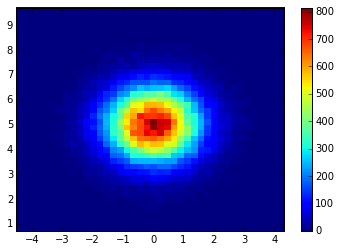

In [56]:
#normal distribution center at x=0 and y=5
x = np.random.randn(100000)
y = np.random.randn(100000)+5

plt.hist2d(x, y, bins=40)
plt.colorbar()
plt.show()